LDA 모델로 토픽 분석  
LDA는 무조건 countervectorize

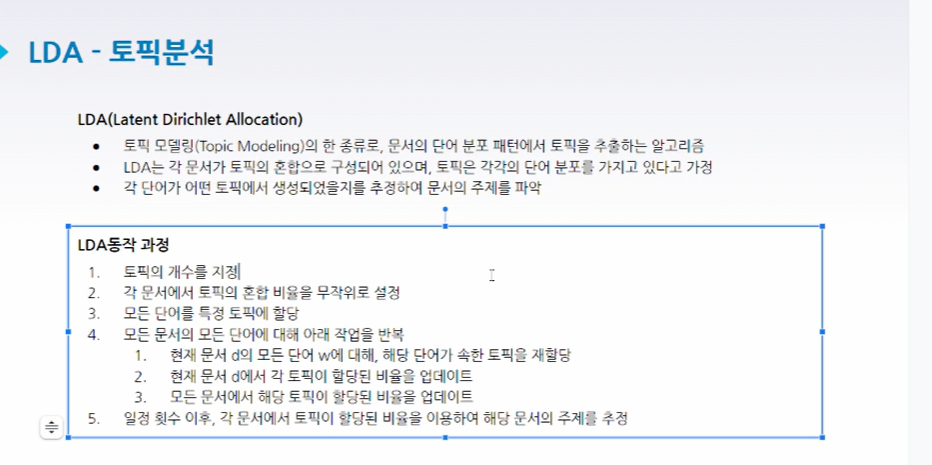

시각화해서 토픽들간의 상관관계도 가능

In [1]:
# 카운트 벡터 시각화해서 보기
!pip install -U pyLDAvis

     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ---------------------------------------- 60.6/60.6 kB 3.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ------------------------------------- -- 2.4/2.6 MB 77.6 MB/s eta 0:00:01
   ---------------------------------------- 2.6/2.6 MB 41.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   -- ------------------------------------- 1.6/24.0 MB 52.2 MB/s eta 0:00:01
   --- ------------------------------------ 2.2/24.0 MB 28.4 MB/s eta 0:00:01
   --- ------------------------------------ 2.3/24.0 MB 18.4 MB/s eta 0:00:02
   ---- ----------------------------------- 2.5/24.0 MB 14.6 MB/s eta 0:00:02
   ----- ---------------------------------- 3.0/24.0 MB 13.9 MB/s eta 0:00:02
   ----- ---------------------------------- 3.2/24.0 MB 14.7 MB/s eta 0:00:02
   ----- ---------------------------------- 3.3/24.0 MB 10.6 MB/s eta 0:00:02
   ----- 

  You can safely remove it manually.
  You can safely remove it manually.

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('./appreply.csv', index_col=0)
df.head()

,text,score
0,NaN,4
1,NaN,5
2,NaN,1
3,"배달의민족 주문시 리뷰를 자주 참고하는 편입니다. 한가지 건의사항이 있다면 최신순,...",4
4,내가 주문했던 과거목록에서도 검색기능이 있었으면 좋겠어요.. 분명 이 가게에 시킨 ...,5


In [6]:
# 결측치 제거
df.dropna(axis=0, inplace=True)

In [9]:
# 이상치 제거
df.drop_duplicates(subset='text', inplace=True)

In [11]:
# 인덱스 다시
df.reset_index(drop=True, inplace=True)

In [12]:
df.head()

,text,score
0,"배달의민족 주문시 리뷰를 자주 참고하는 편입니다. 한가지 건의사항이 있다면 최신순,...",4
1,내가 주문했던 과거목록에서도 검색기능이 있었으면 좋겠어요.. 분명 이 가게에 시킨 ...,5
2,"검색 화면에서 전체/배달/포장 탭 중 배달 탭을 스크롤 내리면서 볼 때, 아래로 스...",1
3,배달팁 낮은 순으로 정렬하면 0~4000원 이런식으로 된 가게가 가장 위로 올라옵니...,2
4,최근 업데이트가 안드로이드5사양 정도에서는 안되는것 같습니다.. 배민 어플 실행시 ...,3


In [14]:
# 명, 형, 동 3개로 나누기
from konlpy.tag import Okt
from tqdm import tqdm
import re

# 토큰 단위로 추출
def tokenize_text(text):
  text = re.sub(r'[^ㄱ-ㅣ가-힣\s]', '', text) # 한글과 공백 제외 삭
  okt = Okt()
  okt_data = okt.pos(text) # 튜플 형태로 단어와 tag값 가지고 온다. 품사를 종류 별로 가져온다

  word_list = []
  for word, tag in okt_data:
    if tag in ['Noun', 'Verb', 'Adjective']: # 명사/동사/형용사 이면
      word_list.append(word) # 리스트에 append
  word_str = ' '.join(word_list)
  return word_str

In [13]:
' '.join(['hi', 'i', 'am', 'a', 'student'])

'hi i am a student'

In [15]:
token_list = []
for temp in tqdm(df['text']):
  token_list.append(tokenize_text(temp)) # 리스트 안에 명형동 문자열 append

token_list

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:23<00:00, 43.17it/s]


['배달 민족 주문 시 리뷰 자주 참고 하는 편입 니 한가지 건의 사항 있다면 최신 점순 뿐 아니라 제 주문 하고 자하 메뉴 특정해서 그 메뉴 리뷰 확인 할 수 있는 기능 있으면 좋을 것 같습니다 메뉴 검색 기능 리뷰 특정 메뉴 검색 기능 필요합니다 주문 수가 많지 않은 메뉴 리뷰 보기 위해 드 래그 하느라 시간 소요 되는 비 효율 발생 합니다 긍정 검토 해 주심 좋을 것 같습니다',
 '내 주문 했던 과거 목록 검색 기능 있었으면 좋겠어요 분명 이 가게 시킨 기억 있는데 뭘 시켰고 맛있게 먹은게 맞는지 알고싶은데 찾기 어렵네요 먹던 메뉴 검색 가능했으면 좋겠어요 예 들면 곱창 치면 과거 시킨 곱창 목록 뜨거나 가게 리뷰 창 리뷰 보기 가 있어도 좋을거 같아요',
 '검색 화면 전체 배달 포장 탭 중 배달 탭 스 크롤 내리면서 볼 때 아래 스 크롤 하는데 자꾸만 왼쪽 오른쪽 넘어가서 전체 탭 포장 탭 보게 되는데 정말 불편합니다 검색 후 배달 탭 포장 탭 마트 탭 뭐 하나 선택 했으면 좌우 넘기는 건 안 하시면 안되나요 가끔 그러는 것 아니고 스 크롤 한 번 내릴 때 왼쪽 넘어가서 전체 탭 가게 되니까 불편하고 답답해서 씁니다',
 '배달 팁 낮은 순 정렬 하면 원 식 된 가게 가장 위로 올라옵니다 지역 따라 추가 배달 료 있다고 별도 체크 하게 되어있어서 배달 팁 원 넘습니다 만원 이상 시키면 배달 팁 원 데 장난 하는 것 아니고 하나 하나 눌러가면서 가격 대별 금액 체크 배달 팁 별도 받는지도 확인 해야 합니다',
 '최근 업데이트 안드로이드 사양 정도 안되는것 같습니다 배민 어플 실행 시 업데이트 하라 나오고 업데이트 누르면 업데이트 진행 안되고 열기 나오고 열기 누르면 업데이트 나오고 무한 반복 삭제 재 설치 환경설정 등 해보아도 같은 증상 요 다른 같은 증상 보이는 글 보니 이번 업데이트 관련 파일 확인 필요해 보입니다 참고 사양 높은 폰 되는거 보니 핸드폰 사양 문제 이번 업데이트 있어 보입니다',
 '찜 매장 구분 좀 해주세요 대체 언제 이면 개선

In [19]:
corpus_list = []
for index in range(len(token_list)):
  corpus = token_list[index]
  if len(set(corpus.split())) < 3: # 띄어쓰기 단위로 나누고 중복 제거한 게 3개 미만이면 뺀다
    corpus_list.append(index) # 나중에 인덱스 번호를 통해 삭제하려고
corpus_list

[]

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# max_df 전체 10퍼센트 나오면 무시. 자주 나오니까 의미 없을 것이다
# max_features 단어 빈도수 최대 1000개
# min_df 2번 이상 나와야 한다. 2번 미만이면 뺀다
# ngram_range 단어를 연달아 붙여서 하나로 사용하겠다. '수업', '시간' -> '수업 시간'
count_vect = CountVectorizer(max_df=0.1, max_features=1000, min_df=2, ngram_range=(1,2))
feat_vect = count_vect.fit_transform(token_list)

In [28]:
count_vect.vocabulary_

{'민족': 303,
 '자주': 714,
 '참고': 815,
 '한가지': 934,
 '건의': 45,
 '사항': 424,
 '있다면': 691,
 '최신': 832,
 '아니라': 511,
 '하고': 897,
 '확인': 990,
 '있으면': 705,
 '좋을': 774,
 '같습니다': 25,
 '특정': 860,
 '수가': 462,
 '않은': 543,
 '보기': 366,
 '위해': 625,
 '되는': 166,
 '발생': 323,
 '합니다': 947,
 '배달 민족': 330,
 '건의 사항': 46,
 '메뉴 리뷰': 269,
 '있는 기능': 686,
 '기능 있으면': 87,
 '좋을 같습니다': 775,
 '메뉴 검색': 267,
 '검색 기능': 49,
 '특정 메뉴': 861,
 '리뷰 보기': 222,
 '했던': 976,
 '목록': 290,
 '있었으면': 702,
 '좋겠어요': 767,
 '분명': 387,
 '시킨': 485,
 '기억': 92,
 '있는데': 687,
 '찾기': 816,
 '좋을거': 776,
 '같아요': 28,
 '주문 했던': 790,
 '기능 있었으면': 86,
 '있었으면 좋겠어요': 704,
 '화면': 989,
 '전체': 732,
 '포장': 880,
 '크롤': 852,
 '아래': 519,
 '하는데': 913,
 '넘어가서': 112,
 '되는데': 170,
 '정말': 746,
 '불편합니다': 399,
 '마트': 229,
 '하나': 900,
 '선택': 450,
 '했으면': 981,
 '좌우': 778,
 '안되나요': 527,
 '가끔': 8,
 '아니고': 510,
 '불편하고': 395,
 '씁니다': 508,
 '배달 포장': 343,
 '낮은': 106,
 '정렬': 744,
 '가장': 16,
 '위로': 622,
 '지역': 803,
 '따라': 200,
 '추가': 834,
 '있다고': 690,
 '별도': 362,
 '체크': 824,
 '하게': 

In [29]:
feat_vect.toarray().shape

(1000, 1000)

# LDA 분석

In [30]:
lda = LatentDirichletAllocation(n_components=5, random_state=0) # 주제를 5개로 찾아라
lda.fit(feat_vect)

LatentDirichletAllocation(n_components=5, random_state=0)

In [34]:
# 5개의 토픽, 1000개의 단어 사전 가중치
lda.components_.shape

(5, 1000)

In [38]:
# lad 모델, 단어사전 이름, 단어 개수
def display_topics(lda_model, feature_names, num_top_words):
  for topic_idx, topic in enumerate(lda_model.components_):
    print('Topic %d:' % (topic_idx+1))

    topic_word_idx = topic.argsort()[::-1] # 큰 것에서 작은 순으로
    top_idx = topic_word_idx[:num_top_words]

    resullt_text = ''
    for temp in top_idx:
      word = feature_names[temp] # 해당되는 단어 가져오기
      resullt_text+= word + ' '

    print(resullt_text)

In [39]:
feature_names = count_vect.get_feature_names_out()
display_topics(lda, feature_names, 10)

Topic 1:
할인 이벤트 취소 확인 사람 금액 포장 알림 하지 만원 
Topic 2:
로그인 고객 해도 계속 취소 전화 인증 삭제 가입 센터 
Topic 3:
사진 문제 시스템 기사 이용 고객 확인 민족 배달 민족 보고 
Topic 4:
좋겠어요 추가 목록 좋겠습니다 화면 선택 별로 있었으면 진짜 취소 
Topic 5:
요청 사항 카드 있습니다 입력 설정 요청 사항 완료 합니다 위치 


In [42]:
feat_vect.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [43]:
topic_result =lda.transform(feat_vect) # 결과값 보기
topic_result

array([[0.86602691, 0.00517126, 0.00527768, 0.00535362, 0.11817053],
       [0.00922631, 0.00912162, 0.17316051, 0.79933049, 0.00916107],
       [0.65858714, 0.00673509, 0.00681379, 0.32100408, 0.00685991],
       ...,
       [0.49703294, 0.00632665, 0.00646798, 0.12014201, 0.37003041],
       [0.00785576, 0.00793945, 0.00782936, 0.968543  , 0.00783243],
       [0.85112729, 0.00509054, 0.13344889, 0.00517927, 0.00515402]])

In [44]:
# 1000개의 댓글이 5개의 토픽 중 몇 퍼센트의 확률인지 소프트맥스로
topic_result.shape

(1000, 5)

In [46]:
topic_result.argmax(axis=1)

array([0, 3, 0, 0, 1, 3, 3, 0, 0, 3, 4, 0, 4, 3, 0, 0, 1, 2, 1, 3, 0, 4,
       4, 1, 1, 2, 3, 0, 3, 0, 0, 4, 1, 1, 2, 3, 0, 4, 2, 4, 2, 3, 2, 0,
       4, 3, 3, 1, 3, 0, 0, 3, 2, 2, 0, 0, 2, 3, 4, 0, 3, 4, 4, 3, 3, 3,
       3, 2, 2, 3, 1, 0, 3, 1, 3, 3, 0, 2, 0, 4, 3, 2, 1, 2, 4, 3, 0, 3,
       2, 0, 2, 3, 0, 4, 0, 4, 0, 3, 1, 0, 2, 3, 4, 1, 0, 0, 0, 0, 0, 3,
       3, 4, 0, 3, 4, 0, 4, 0, 1, 2, 4, 2, 2, 4, 2, 2, 2, 3, 3, 3, 2, 4,
       3, 4, 3, 4, 2, 4, 2, 2, 1, 3, 3, 4, 4, 0, 4, 0, 4, 2, 1, 4, 3, 3,
       1, 2, 3, 4, 0, 0, 2, 0, 4, 3, 4, 3, 2, 3, 3, 0, 0, 2, 1, 3, 0, 0,
       2, 0, 1, 3, 0, 3, 2, 0, 1, 4, 0, 0, 0, 2, 3, 0, 0, 0, 4, 3, 0, 0,
       1, 2, 4, 1, 1, 3, 4, 4, 0, 3, 1, 3, 3, 1, 4, 2, 4, 1, 4, 0, 2, 2,
       0, 1, 0, 3, 3, 3, 1, 1, 1, 0, 3, 1, 3, 0, 2, 2, 4, 3, 3, 2, 2, 0,
       2, 1, 3, 2, 1, 4, 1, 3, 2, 4, 1, 2, 3, 3, 0, 3, 0, 2, 4, 1, 1, 4,
       4, 1, 4, 0, 2, 2, 1, 0, 2, 0, 1, 3, 0, 3, 2, 1, 0, 3, 2, 0, 0, 3,
       3, 3, 4, 2, 3, 0, 0, 1, 2, 2, 1, 4, 2, 1, 3,

In [47]:
df['topic_num'] = topic_result.argmax(axis=1)
df.head()

,text,score,topic_num
0,"배달의민족 주문시 리뷰를 자주 참고하는 편입니다. 한가지 건의사항이 있다면 최신순,...",4,0
1,내가 주문했던 과거목록에서도 검색기능이 있었으면 좋겠어요.. 분명 이 가게에 시킨 ...,5,3
2,"검색 화면에서 전체/배달/포장 탭 중 배달 탭을 스크롤 내리면서 볼 때, 아래로 스...",1,0
3,배달팁 낮은 순으로 정렬하면 0~4000원 이런식으로 된 가게가 가장 위로 올라옵니...,2,0
4,최근 업데이트가 안드로이드5사양 정도에서는 안되는것 같습니다.. 배민 어플 실행시 ...,3,1


In [48]:
topic_list = []
for idx,topic in enumerate(topic_result):

    topic_num = topic.argmax()  # 가장 큰 값의 인덱스 번호
    topic_list.append([topic_num,topic[topic_num]]) # 확률을 넣음

df['topic'] = topic_list
df

,text,score,topic_num,topic
0,"배달의민족 주문시 리뷰를 자주 참고하는 편입니다. 한가지 건의사항이 있다면 최신순,...",4,0,"[0, 0.8660269085726331]"
1,내가 주문했던 과거목록에서도 검색기능이 있었으면 좋겠어요.. 분명 이 가게에 시킨 ...,5,3,"[3, 0.7993304876024279]"
2,"검색 화면에서 전체/배달/포장 탭 중 배달 탭을 스크롤 내리면서 볼 때, 아래로 스...",1,0,"[0, 0.6585871416314841]"
3,배달팁 낮은 순으로 정렬하면 0~4000원 이런식으로 된 가게가 가장 위로 올라옵니...,2,0,"[0, 0.5102756078613037]"
4,최근 업데이트가 안드로이드5사양 정도에서는 안되는것 같습니다.. 배민 어플 실행시 ...,3,1,"[1, 0.6680773072430914]"
...,...,...,...,...
995,갑자기 로그아웃 되더니 비밀번호 변경 실패 메세지가 계속 뜨네요. 휴대폰 번호로 인...,1,1,"[1, 0.8757935197834004]"
996,기사님이 상품 픽업을 하셨는지 표시되면 더 좋을 것 같습니다. 가게에서 조리가 늦게...,3,0,"[0, 0.5820028289814084]"
997,요즘 요기요 보다 배민을 많이 쓰는 사람입니다 전화보다 앱을 써서 좀더 간편하고 다...,3,0,"[0, 0.4970329439718612]"
998,취소 됐으면 적어도 전화 주는 제도는 있어야하는거 아닌가요? 주문해놓고 다른거 하는...,1,3,"[3, 0.9685430043996618]"


In [50]:
topic_df = pd.DataFrame(topic_list, columns=['토픽 번호', '확률'])
topic_df['댓글'] = df['text']

topic_df.head()

,토픽 번호,확률,댓글
0,0,0.866027,"배달의민족 주문시 리뷰를 자주 참고하는 편입니다. 한가지 건의사항이 있다면 최신순,..."
1,3,0.799330,내가 주문했던 과거목록에서도 검색기능이 있었으면 좋겠어요.. 분명 이 가게에 시킨 ...
2,0,0.658587,"검색 화면에서 전체/배달/포장 탭 중 배달 탭을 스크롤 내리면서 볼 때, 아래로 스..."
3,0,0.510276,배달팁 낮은 순으로 정렬하면 0~4000원 이런식으로 된 가게가 가장 위로 올라옵니...
4,1,0.668077,최근 업데이트가 안드로이드5사양 정도에서는 안되는것 같습니다.. 배민 어플 실행시 ...


In [53]:
topic_df[topic_df['토픽 번호']==4].sort_values(by='확률',ascending=False)

,토픽 번호,확률,댓글
135,4,0.986951,평소 배민 앱 잘 이용하고있습니다. 한가지 배달서비스관련하여 개선했으면 하는게 있는...
975,4,0.984680,잘사용중입니다만 배달기사분들이 배달요청사항을 잘 수용안해주셔서 배달기사분들에게 교육...
131,4,0.979341,잘쓰고 맛있는고 잘먹고 있습니다. 한가지 아쉬운 점은 예전엔 그렇지 않았는데 요즘 ...
200,4,0.977451,"배달료순으로 정렬하는 기능이 있는데, 가게마다 배달료가 단일이 아니고 0~4,000..."
904,4,0.976843,개인적으로는 각 가게 별로 요청사항을 저장하는 기능이 생겼으면 합니다 가게 별로 빼...
...,...,...,...
329,4,0.372868,안녕하세요. 튕김 현상이 너무 잦아서 글 작성하게 됐습니다. 이것 저것 뭐가 많이 ...
968,4,0.370584,초기에는 좋은 앱이라고 생각했는데 쓰다보니 기존 회원이 계속해서 이 앱은 써야하는 ...
727,4,0.366414,전화로 주문하면 번거롭고 귀찮았는데~ 메뉴도 볼수있고 간편하게 시킬수있어서 좋네요!...
387,4,0.350384,의견 하나만 드려봅니다:) 안녕하세요! 어플 정말 잘 쓰고 있습니다! 혹시 오픈시간...


In [54]:
import pyLDAvis.lda_model

pyLDAvis.enable_notebook()
vis = pyLDAvis.lda_model.prepare(lda,feat_vect,count_vect)
pyLDAvis.display(vis)